(-1, 15]      2965677
(15, 30]       355167
(60, 2475]     328959
(30, 60]       295818
Name: ARR_DELAY_MINUTES, dtype: int64
 
Number of airlines =     18
Number of origins =      358
Number of destinations = 358


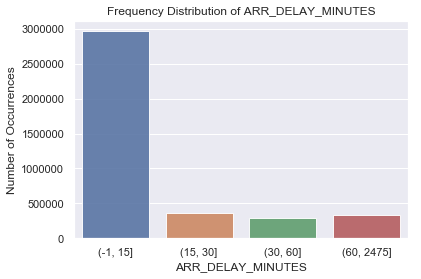

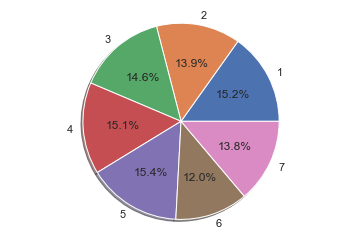

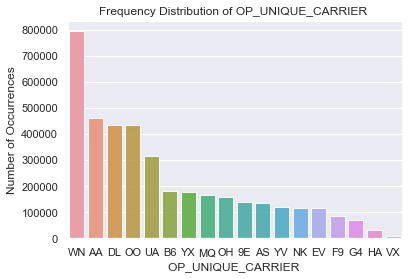

C:\Users\Maryem Samet\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Maryem Samet\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Estimator currently in use:

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=20, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

Mean accuracy on Training set: 0.877232403091
Mean accuracy on Test set:     0.838706516165
Null accuracy on Test set:     0.7517941820768497
 
Confusion matrix:
tn=810979  fp= 73483
fn= 41111  tp= 50042

Detailed classification report: 
             precision    recall  f1-score   support

          0       0.93      0.91      0.92    889889
          1       0.34      0.47      0.40    106281
          2       0.61      0.57      0.59     88897
          3       0.93      0.82      0.87     98620

avg / total       0.86      0.84      0.85   1183687

Accuracy for Curr

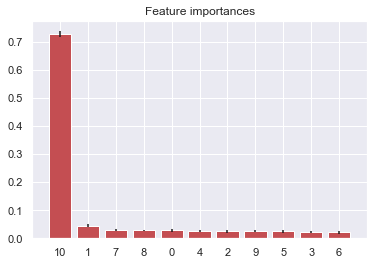

In [11]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tkinter import *
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score,f1_score
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from tkinter import *
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
import pickle

data = pd.read_csv('DataminingDataset/FlightDelay.csv',sep=',', header=0) 
data = data.drop("DEP_DEL15", axis=1)
data=data.drop("ARR_DEL15",axis=1)
data=data.drop(["ARR_DELAY_MINUTES_quantized","DEP_DELAY_MINUTES_quantized"],axis=1)
data.head()


#show duplicated data 
data.duplicated(subset=None, keep='first')
#remove duplicated data 
data.drop_duplicates(keep='first', inplace=True)
len(data)
#verify missing value
data.isnull().sum()

#print(data.info())
#data.describe()


#binning ARR_DELAY_MINUTES into 4 bins 
data['ARR_DELAY_MINUTES']=data['ARR_DELAY_MINUTES'].astype(np.int64)
filter_values = [-1, 15, 30, 60, 2475]   
out = pd.cut(data['ARR_DELAY_MINUTES'], bins=filter_values)
counts = pd.value_counts(out)
# counts is a Series
print(counts)
data['ARR_DELAY_MINUTES']= out
#data.head()
#data.info()

#some statistics
airlines        = sorted(data.OP_UNIQUE_CARRIER.unique())
origins         = sorted(data.ORIGIN.unique(), reverse=True)
destinations    = sorted(data.DEST.unique(), reverse=True)
numAirlines     = len(airlines)
numOrigins      = len(origins)
numDestinations = len(destinations)
print(' ')
print('Number of airlines =     %i' %numAirlines)
print('Number of origins =      %i' %numOrigins)
print('Number of destinations = %i' %numDestinations)


#PLOT Frequency distribution of ARR_DELAY_MINUTES
ORIGIN_count = data['ARR_DELAY_MINUTES'].value_counts()
sns.set(style="darkgrid")
sns.barplot(ORIGIN_count.index, ORIGIN_count.values, alpha=0.9)
plt.title('Frequency Distribution of ARR_DELAY_MINUTES')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('ARR_DELAY_MINUTES', fontsize=12)
plt.show()


#PLOT DAY_OF_WEEK 
labels = data['DAY_OF_WEEK'].astype('category').cat.categories.tolist()
counts = data['DAY_OF_WEEK'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

#PLOT Frequency distribution of Destination
dest_count = data['OP_UNIQUE_CARRIER'].value_counts()
sns.set(style="darkgrid")
sns.barplot(dest_count.index, dest_count.values, alpha=0.9)
plt.title('Frequency Distribution of OP_UNIQUE_CARRIER ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('OP_UNIQUE_CARRIER ', fontsize=12)
plt.show()

#Prepare training and test data for Different models

#Convertion 
data['DEP_DELAY_MINUTES']=data['DEP_DELAY_MINUTES'].astype(np.int64)
#data['DEP_DEL15']=data['DEP_DEL15'].astype(np.int64)
data['ARR_DELAY_MINUTES']=data['ARR_DELAY_MINUTES'].astype(np.object)

# Categorical boolean mask
categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_feature_mask].tolist()
le = preprocessing.LabelEncoder()
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))
data[categorical_cols].head(10)

def sauvegarderModelDecisionTree(data):
    X=data.drop(["ARR_DELAY_MINUTES"],axis=1) # toute la dataset sauf la colonne à predir ARR_DELAY_MINUTES
    y=data['ARR_DELAY_MINUTES'] # la colonne à predire
    classifier = DecisionTreeClassifier()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0)
    #créer un modele
    c = classifier.fit(X_train, y_train)
    
    # Dump the trained decision tree classifier with Pickle
    f = open('DataminingDataset/Decisiontree.pkl', 'wb')
    pickle.dump(c, f)
    f.close()
    evaluationModel(c,X_test,y_test,X_train,y_train)

    
def sauvegarderModelBayes(data) :
    X=data.drop(["ARR_DELAY_MINUTES"],axis=1) # toute la dataset sauf la colonne à predir ARR_DELAY_MINUTES
    y=data['ARR_DELAY_MINUTES'] # la colonne à predire
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0)
    nb = naive_bayes.MultinomialNB(fit_prior=True)# un algo d'apprentissage
    c=nb.fit(X_train, y_train)

    # Dump the trained decision tree classifier with Pickle
    bayes_pkl_filename = 'DataminingDataset/my_Bayes.pkl'
    bayes_model_pkl = open(bayes_pkl_filename, 'wb')
    pickle.dump(c, bayes_model_pkl)
    # Close the pickle instances
    bayes_model_pkl.close()
    evaluationModel(nb,X_test,y_test,X_train,y_train)

    
def sauvegarderModelRandomForest(data): 
    X=data.drop(["ARR_DELAY_MINUTES"],axis=1) # toute la dataset sauf la colonne à predir ARR_DELAY_MINUTES
    y=data['ARR_DELAY_MINUTES'] # la colonne à predire
    
    #Training the RandomForest Algorithm
    rf = RandomForestClassifier(n_estimators=20, max_depth=20, min_samples_leaf=2, 
                             criterion="gini", min_samples_split=2, min_weight_fraction_leaf=0.0, 
                             max_features="auto", max_leaf_nodes=None, bootstrap=True,
                             oob_score=True, verbose=0, warm_start=False, random_state=0, 
                             n_jobs=-1, class_weight="balanced_subsample")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
    
    #recuperer le model
    c=rf.fit(X_train, y_train)
    #res = rf.predict(X_test)
    Forest_pkl_filename = 'DataminingDataset/Forestclassifier.pkl'
    # Open the file to save as pkl file
    forest_model_pkl = open(Forest_pkl_filename, 'wb')
    pickle.dump(c, forest_model_pkl)
    # Close the pickle instances
    forest_model_pkl.close()
    evaluationModel(rf,X_test,y_test,X_train,y_train)
    bestFeatureWithRandomForest(rf,X)
    
    

def bestFeatureWithRandomForest(rf,X):
    # Important features
    importances = rf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")
    
    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()
    
def evaluationModel (model,X_test,y_test,X_train,y_train):
    print("Estimator currently in use:\n\n%s\n" %model)

    # score the model
    Ntest    = len(y_test)
    Ntestpos = len([val for val in y_test if val])
    NullAcc  = float(Ntest-Ntestpos)/Ntest
    print("Mean accuracy on Training set: %s" %model.score(X_train, y_train))
    print("Mean accuracy on Test set:     %s" %model.score(X_test, y_test))
    print("Null accuracy on Test set:     %s" %NullAcc)
    print(" ")
    y_pred = model.predict(X_test)
    f1_score(y_test, y_pred, average='weighted')
    y_true, y_pred = y_test, model.predict(X_test)
    cm             = confusion_matrix(y_true, y_pred)
    print("Confusion matrix:\ntn=%6d  fp=%6d\nfn=%6d  tp=%6d" %(cm[0][0],cm[0][1],cm[1][0],cm[1][1]))
    print("\nDetailed classification report: \n%s" %classification_report(y_true, y_pred))
    print("Accuracy for Current model : ",accuracy_score(y_test,y_pred))

    
    

#sauvegarderModelDecisionTree(data)   
#sauvegarderModelBayes(data) 
sauvegarderModelRandomForest(data)

    